# **6.02 学習済みモデルを動かそう**

# 【VGG16の学習済みモデルを作る】

リスト6-14

In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16()

553467096/553467096 [==============================] - 5s 0us/step


リスト6-15

In [ ]:
model.summary(line_length=120)

Model: "vgg16"
________________________________________________________________________________________________________________________
 Layer (type)                                         Output Shape                                    Param #           
 input_1 (InputLayer)                                 [(None, 224, 224, 3)]                           0                 
                                                                                                                        
 block1_conv1 (Conv2D)                                (None, 224, 224, 64)                            1792              
                                                                                                                        
 block1_conv2 (Conv2D)                                (None, 224, 224, 64)                            36928             
                                                                                                                        
 block1_pool (Max

# 【データを読み込んで、渡して予測】

## 画像をアップロードしておく

リスト6-16

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.1 MB/s eta 0:00:00


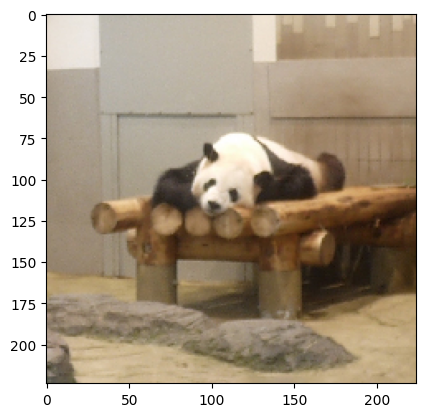

35363/35363 [==============================] - 0s 0us/step
これは、「giant_panda」です。（94.6%)
これは、「sloth_bear」です。（0.7%)
これは、「skunk」です。（0.3%)
これは、「American_black_bear」です。（0.3%)
これは、「colobus」です。（0.3%)


In [ ]:
!pip install keras_preprocessing
from keras.applications.vgg16 import decode_predictions, preprocess_input
from keras_preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

testimg = load_img("test.jpg", target_size=(224,224))
plt.imshow(testimg)
plt.show()

data = img_to_array(testimg)
data = np.expand_dims(data, axis=0)
data = preprocess_input(data)
predicts = model.predict(data)
results = decode_predictions(predicts, top=5)[0]
for r in results:
    name = r[1]
    pct = r[2]
    print(f"これは、「{name}」です。（{pct:.1%})")

リスト6-17

1/1 [==============================] - 1s 644ms/step


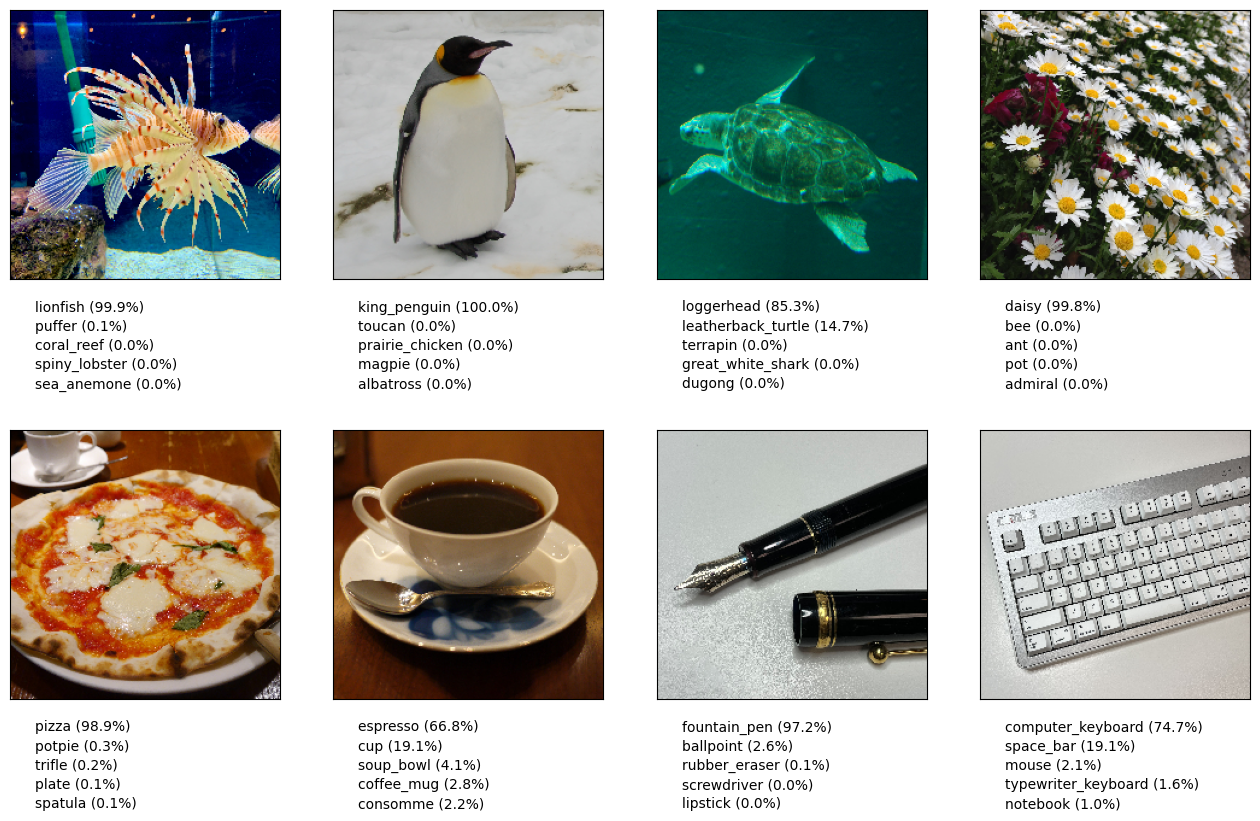

In [ ]:
filenames = ["img1.jpg","img2.jpg","img3.jpg","img4.jpg","img5.jpg","img6.jpg","img7.jpg","img8.jpg"]

img = []
plt.figure(figsize=(16,10))
for i, filename in enumerate(filenames):
    img.append(load_img(filename, target_size=(224, 224))) # 224x224
    data = img_to_array(img[i])
    data = np.expand_dims(data, axis=0)
    data = preprocess_input(data)
    predicts = model.predict(data)
    results = decode_predictions(predicts, top=5)[0]

    plt.subplot(2, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i])

    for i, r in enumerate(results):
        name = r[1]
        pct = r[2]
        msg = f"{name} ({pct:.1%})"
        plt.text(20, 250+i*16, msg)
plt.show()